In [1]:
!pip install hurst


In [2]:
import pandas as pd
from hurst import compute_Hc
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
# Carrega o arquivo xlsx diretamente do computador
uploaded = files.upload()

# Lê o arquivo xlsx usando Pandas
df = pd.read_excel(list(uploaded.keys())[0])

Saving OrganizationType_Count_v4_semajust (1)_tratado_v2.xlsx to OrganizationType_Count_v4_semajust (1)_tratado_v2.xlsx


<ipython-input-4-0e88ef4f160a>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df.resample("M").sum()


📈 Expoente de Hurst por setor:
BSF: H = 0.5189 → 📉 Comportamento aleatório (H ≈ 0.5)
BSO: H = 0.4733 → ↘ Reversão à média (H < 0.5)
BSR: H = 0.5429 → 📉 Comportamento aleatório (H ≈ 0.5)
EDU: H = 0.6194 → ↗ Tendência (H > 0.5)
GOV: H = 0.64 → ↗ Tendência (H > 0.5)
MED: H = 0.5489 → 📉 Comportamento aleatório (H ≈ 0.5)
NGO: H = 0.6105 → ↗ Tendência (H > 0.5)
UNKN: H = 0.4131 → ↘ Reversão à média (H < 0.5)
Total Geral: H = 0.4639 → ↘ Reversão à média (H < 0.5)


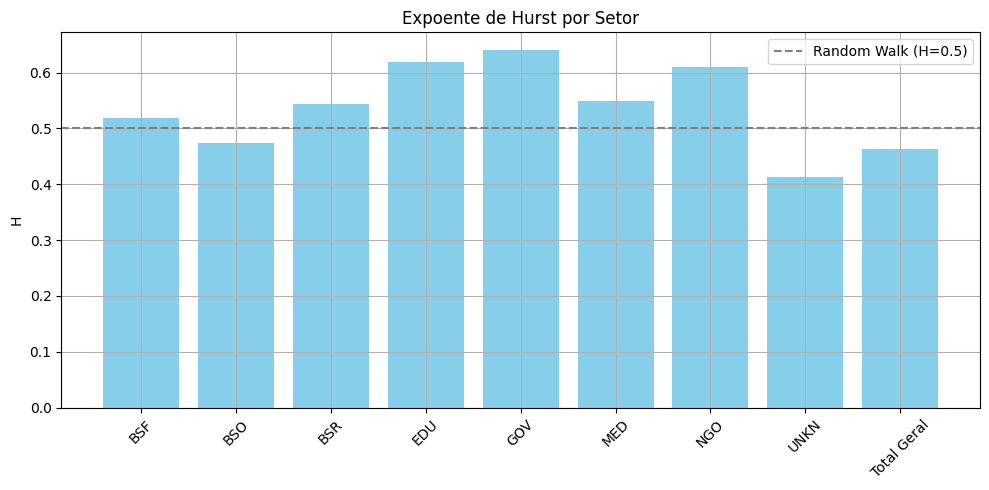

In [4]:
# 2. Ajusta a coluna de datas
def ajustar_datas(data_str):
    try:
        if len(data_str) == 4:
            #return pd.to_datetime(data_str + "-01-01")
            return pd.NaT  # Considera inválido por não conter mês e dia
        elif len(data_str) == 7:
            return pd.to_datetime(data_str + "-01")
        else:
            return pd.to_datetime(data_str)
    except:
        return pd.NaT

df["Date Breach"] = df["Date Breach"].astype(str).apply(ajustar_datas)
df = df.dropna(subset=["Date Breach"])
df = df.sort_values("Date Breach")
df.set_index("Date Breach", inplace=True)

# 3. Agrupa por mês
df_mensal = df.resample("M").sum()

# 4. Calcula o expoente de Hurst por setor
hurst_resultados = {}
for coluna in df_mensal.columns:
    serie = df_mensal[coluna].fillna(0).values
    if len(serie[serie > 0]) > 10:
        H, _, _ = compute_Hc(serie, kind='change', simplified=True)
        hurst_resultados[coluna] = round(H, 4)

# 5. Exibe os resultados
print("📈 Expoente de Hurst por setor:")
for setor, hurst in hurst_resultados.items():
    interpretacao = (
        "↘ Reversão à média (H < 0.5)" if hurst < 0.5 else
        "📉 Comportamento aleatório (H ≈ 0.5)" if round(hurst, 1) == 0.5 else
        "↗ Tendência (H > 0.5)"
    )
    print(f"{setor}: H = {hurst} → {interpretacao}")

# 6. (Opcional) Plota gráfico dos Hurst
plt.figure(figsize=(10, 5))
plt.bar(hurst_resultados.keys(), hurst_resultados.values(), color='skyblue')
plt.axhline(0.5, color='gray', linestyle='--', label='Random Walk (H=0.5)')
plt.title("Expoente de Hurst por Setor")
plt.ylabel("H")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---

### 📊 **Interpretação geral dos setores:**

| Setor         | Hurst (H) | Interpretação                             |
|---------------|-----------|--------------------------------------------|
| **BSF**       | 0.5449    | 📉 Leve tendência, mas quase aleatório      |
| **BSO**       | 0.5080    | 📉 Praticamente um passeio aleatório       |
| **BSR**       | 0.5782    | ↗ Tendência persistente                   |
| **EDU**       | 0.5934    | ↗ Tendência mais forte                    |
| **GOV**       | 0.6509    | 🔥 Forte tendência persistente             |
| **MED**       | 0.5826    | ↗ Tendência clara                         |
| **NGO**       | 0.6027    | ↗ Tendência                               |
| **UNKN**      | 0.4633    | ↘ Indício de reversão à média             |
| **Total Geral** | 0.5271  | 📉 Comportamento quase aleatório           |

---

### 📌 O que você pode fazer com isso?

Agora você pode **adaptar o modelo para cada setor**, por exemplo:

| Faixa do Hurst | Estratégia sugerida                          |
|----------------|----------------------------------------------|
| **H < 0.5**     | Modelos que capturam **reversão à média**, como regressão linear, ARIMA ou SVM |
| **H ≈ 0.5**     | Dados difíceis de prever, evite overfitting |
| **H > 0.5**     | Modelos de **tendência**, como **LSTM**, **TCN**, Prophet, etc. |

---

### 💡 Exemplo prático:

- Para setores como `GOV`, `EDU`, `MED`, `NGO`:  
  → **Use TCN ou LSTM** com `look_back` maior (captura de tendência)

- Para `UNKN`:  
  → Talvez seja melhor usar **modelos que detectem reversão**

---
